# <center>EDA on Breast Cancer Dataset</center>
<img  src="https://raw.githubusercontent.com/vishaljg/ds_shared/master/Types-of-Breast-Cancer-e1564777000188.png" align='center'><br/>

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
- 2. [Importing Packages](#section2)</br>
- 3. [Loading Data](#section3)<br>
    - 3.1 [Description of the Datasets](#section301)<br>
    - 3.2 [Pandas profiling pre processing](#section302)<br>
- 4. [Data Preprocessing](#section4)<br>
    - 4.1 [Creating Age Group buckets](#section401)<br>
    - 4.2 [Adding Years_Of_Surgery ie: Year_Of_Operation in full year](#section402)<br>
    - 4.3 [Adding column SurvivalGreaterThan_5yrs (Yes\No)](#section403)<br>
- 5. [Pandas profiling post processing](#section5)<br>
- 6. [Overall Survival Status Post Surgery](#section6)<br>
- 7.  [Is there any corelation between "Age","Status","Pos_axillary_nodes","Year_Of_Surgery"?](#section7)<br>
- 8. [Analysis based on Year of Surgery](#section8)<br>
- 9. [Analysis based on Year of Surgery and Survival Status](#section9)<br>
- 10. [Analysis based on Age Group](#section10)<br>
    - 10.1 [Age Group wise Patients Distribution](#section1001)<br>
    - 10.2 [Age Group wise Survival Status](#section1002)<br>
- 11. [Analysis based on Positive Axillary Nodes](#section11)<br>    
- 12. [Survival status analysis with Age,Year of Surgery and Positive Axillary Nodes with Box plot and Violin plot](#section12)<br> 
- 13. [Conclusion](#section13)<br> 
    - 13.1 [Actionable Insights](#section1301)<br>

<a id=section1></a> 
## 1. Problem Statement 
The dataset contains cases from a study that was conducted between **1958 and 1970** at the Uni-versity of Chicago's Billings Hospital on the __survival of patients who had undergone surgery for breast cancer.__.

We need to see how different factors affecting survival status.

<a id=section101></a> 
### 1.1. Introduction
__Breast cancer__ occurs when breast cells begin to grow abnormally.

The __lymphatic system__ is a network of tissues and organs that help rid the body of toxins, waste and other unwanted materials. 
The primary function of the lymphatic system is to transport lymph, a fluid containing infection-fighting white blood cells, throughout the body

__Metastatic Breast Cancer__ is breast cancer that has __spread to other parts of the body__ through blood stream and the lymphatic system.

__Axillary lymph nodes__

- Lymph nodes in human armpit.

- Usually range between 20 and 49 in number.

- If cancer is spread in these nodes then need to remove infected nodes.

- If more nodes are removed , it will impact  Lymphatic system. 

<a id=section2></a> 
## 2. Importing Packages

In [21]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

<a id=section3></a>
## 3. Loading Data

In [22]:
df_brc = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")

In [23]:
df_brc.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [24]:
df_brc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


<a id=section301></a>
### 3.1. Description of the Dataset

- ```info``` function gives us the following insights into the df_brc dataframe:

  - There are a total of **306 samples (rows)** and **4 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype.
  
  - There are no **missing** values in any column.


The data set contains  below columns:

 - <strong>Age :</strong> Age of patient at time of surgery
 - <strong>Years_of_operation :</strong> Patient's year of operation (19XX)
 - <strong>Pos_axillary_nodes :</strong> Number of positive axillary nodes detected 
 - <strong>Status :</strong> Survival status<br>
    <strong>1-</strong> The patient survived 5 years or longer post surgery<br>
    <strong>2-</strong> The patient died within 5 year
    


In [6]:
df_brc.describe(include='all')

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


There doesnt seems to be any discrepancies in dataset.

<a id=section302></a>
### 3.2. Pandas profiling post processing

In [7]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(df_brc)
profile.to_file("df_brc_pre_profiling.html")  


**Initial observations:**
- Number of records: **306**
- Summary of data types in this dataset:
 - There are four variables in dataset:
 - <em>Numeric</em>: <strong>Age</strong> (integer)
 - <em>Numeric</em>: <strong>Years_of_operation</strong> (integer)
 - <em>Numeric</em>: <strong>Pos_axillary_nodes</strong> (integer)
 - <em>Boolean</em>: <strong>Status</strong> (boolean)
- <strong>Missing Values:</strong>There are no missing values
- **Years_of_operation** - has 12 unique values, which means data is for 12 distinct years
- **Lowest (3.6%)** number of surgeries are done in **1969** and **highest (11.8%)** number of surgeries are done in **1958**
- **Status** - **73.5 %** of patients had **survived for more than 5 years** and **26.5 %** for patients **died in less than 5 years**  
- **Pos_axillary_nodes** has a **skewness** of **2.9838** and **kurtosis** of **11.731**.
  - **Values  between 11 to 52 are outliers**, as it lies far away from the **Q3 (75th percentile)** value **(4)**.
  - **We cannot omit outliers basis our Assumption that these are correct medical observations without human error**.  
- **44.4 %** of surgeries does not show any positive axillary node.

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1. Creating Age Group buckets column

In [25]:
#Creating Age Group buckets
cut_age_labels = ['30-39', '40-49', '50-59','60-69','70-79','80-89']
cut_age_bins = [ 29, 39, 49, 59, 69, 79, 89]
df_brc['Age_Group'] = pd.cut(df_brc['Age'], bins=cut_age_bins, labels=cut_age_labels,include_lowest=True)

<a id=section402></a>
### 4.2. Adding Years_of_Surgery ie: Years_of_operation to full year

In [26]:
def getYear_Of_Surgery(opsyear):                                 # Create a new column "Year_Of_Surgery" that replaces out-of-range ages with "NaN"
      return 1900 + opsyear


df_brc['Year_Of_Surgery'] = df_brc['Years_of_operation'].apply(getYear_Of_Surgery)

<a id=section403></a>
### 4.3. Adding column SurvivalGreaterThan_5yrs

In [27]:
def getSurvivalGreaterThan_5yrs(Status):                            # Create a new column "SurvivalGreaterThan_5yrs" that will provide status in text.
    if int(Status) == 1:
        return "Yes"
    else:
        return "No"
    
df_brc['SurvivalGreaterThan_5yrs'] = df_brc['Status'].apply(getSurvivalGreaterThan_5yrs)    

In [28]:
df_brc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
Age                         306 non-null int64
Years_of_operation          306 non-null int64
Pos_axillary_nodes          306 non-null int64
Status                      306 non-null int64
Age_Group                   306 non-null category
Year_Of_Surgery             306 non-null int64
SurvivalGreaterThan_5yrs    306 non-null object
dtypes: category(1), int64(5), object(1)
memory usage: 15.0+ KB


<a id=section5></a>
## 5. Pandas profiling post processing

In [29]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(df_brc)
profile.to_file("df_brc_post_profiling.html")  

**Additonal observations:**
- **Approximately 87%** surgeries are performed for patients **with age 40 years onwards.**

<a id=section6></a>
## 6. Overall Survival Status Post Surgery

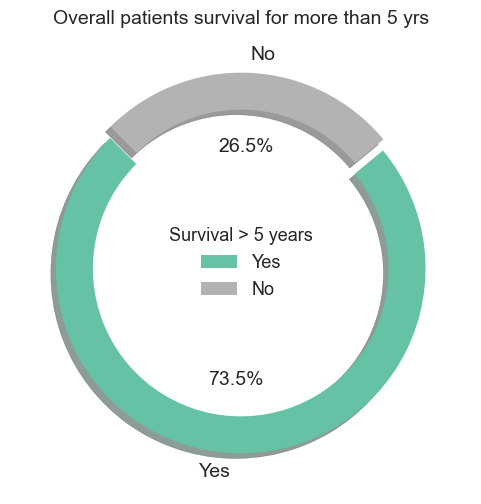

In [30]:
df_brc['SurvivalGreaterThan_5yrs'].value_counts().plot(kind='pie', explode=[0.03,0.03], fontsize=14,autopct='%3.1f%%',figsize=(6,6), shadow=True, startangle=135,legend=True,wedgeprops=dict(width=0.20), cmap='Set2')
plt.title('Overall patients survival for more than 5 yrs',fontsize=14)
plt.legend(loc='center')
plt.legend(loc='center',fontsize=13,title = "Survival > 5 years",title_fontsize = 13)
plt.ylabel('')
plt.show()

<U><b>Observation</b></U><BR>
**Overall 73.5 %** patients survived for more than 5 years and **26.5 %** patients died before 5 years post surgery.

<a id=section7></a>
## 7. Is there any corelation between "Age","Status","Pos_axillary_nodes","Year_Of_Surgery"?

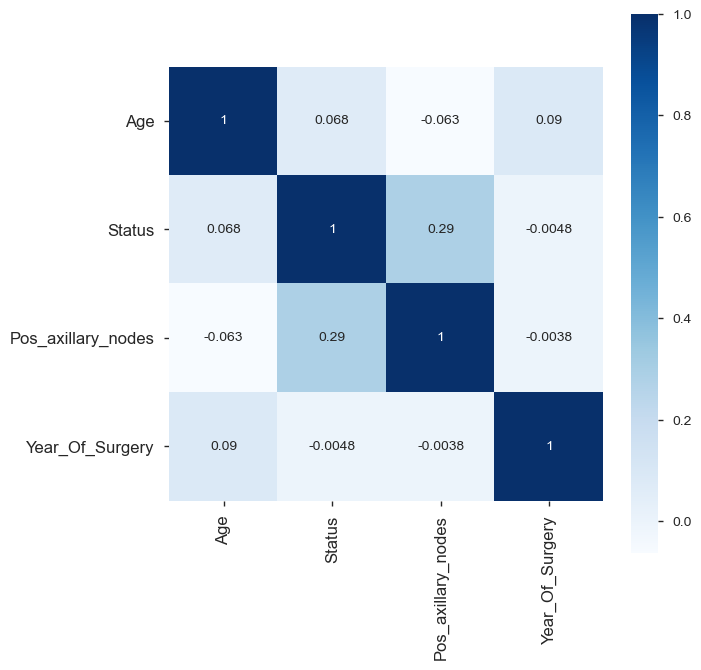

In [256]:
features_correlation = df_brc[["Age","Status","Pos_axillary_nodes","Year_Of_Surgery"]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Blues')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.show()

<U><b>Observation</b></U><BR>
- There is small correlation of **0.29** between Pos_Axillary_nodes and Survival Status
- Also there is small correlation between Age and Status     

<a id=section8></a>
## 8. Analysis based on Year of Surgery

Text(0.5, 1.0, 'Distribution of Surgeries across Years')

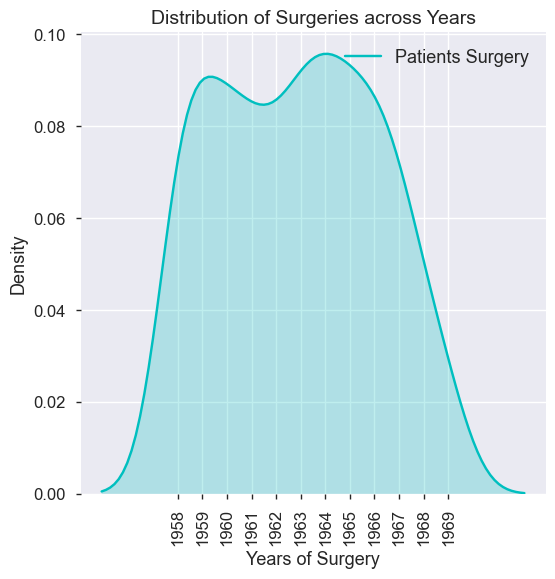

In [31]:
a4_dims = (6, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df_brc['Year_Of_Surgery'], shade=True, Label='Patients Surgery', color='c')
plt.xlabel("Years of Surgery",fontsize=13)
plt.ylabel("Density",fontsize=13)
plt.xticks(np.arange(1958, 1970, step=1),rotation=90,fontsize=12)
plt.yticks(fontsize=12)  
plt.legend(loc='upper right',fontsize=13)
plt.title("Distribution of Surgeries across Years",fontsize=14)


<U><b>Observation</b></U><BR>
- Highest number of surgeries are seen in year **1964**.
- Reducion in surgeries are seen from **1967**

<a id=section9></a>
## 9. Analysis based on Year of Surgery and Survival Status

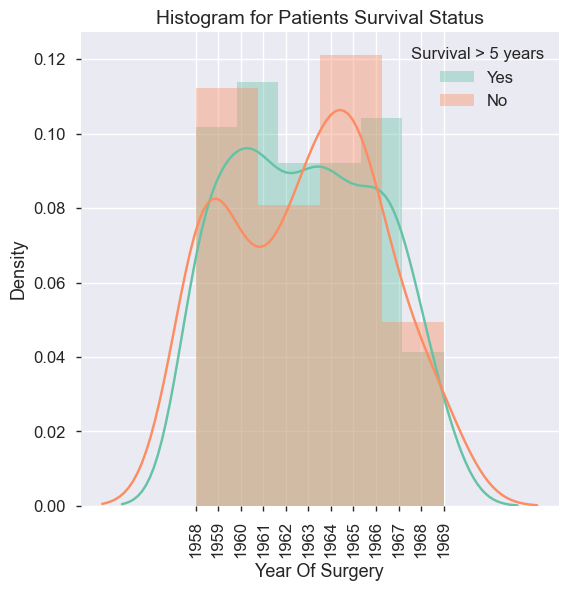

In [32]:
    sns.FacetGrid(data = df_brc, hue = 'SurvivalGreaterThan_5yrs',size=5.5,legend_out=False,palette='Set2') \
    .map(sns.distplot, 'Year_Of_Surgery') \
    .add_legend(); 
    plt.title("Histogram for Patients Survival Status",fontsize=14)
    plt.xlabel("Year Of Surgery",fontsize=13)
    plt.ylabel("Density",fontsize=13)
    plt.xticks(np.arange(1958, 1970, step=1),rotation=90,fontsize=12)
    plt.yticks(fontsize=12)  
    plt.legend(loc='upper right',fontsize=12,title = "Survival > 5 years",title_fontsize = 12)

<U><b>Observation</b></U><BR>
- Largest number of patients **Died in less than 5 years** post surgery, between **1964 to 1965**
- Largest number of patients **Survived for more than 5 years** post surgey are in **1960**

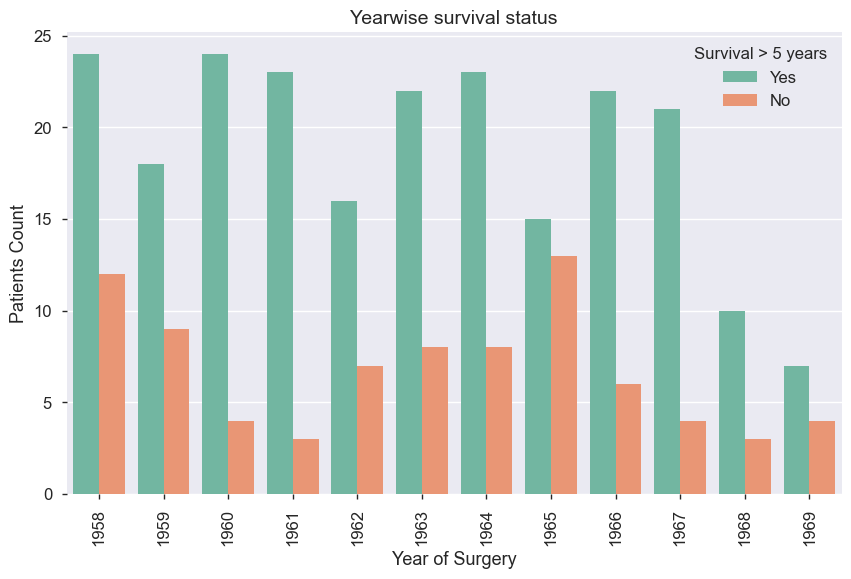

In [255]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot("Year_Of_Surgery", hue="SurvivalGreaterThan_5yrs", data=df_brc,palette='Set2')
plt.title('Yearwise survival status',fontsize=14)
plt.xlabel('Year of Surgery',fontsize=13)
plt.ylabel('Patients Count',fontsize=13)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)  
plt.legend(loc='upper right',fontsize=12,title = "Survival > 5 years",title_fontsize = 12)
plt.show()

<U><b>Observation</b></U><BR>
- **Good survival rate** is seen for surgeries done in **1960,1961,1966 and 1967**

<a id=section10></a>
## 10. Analysis based on Age Group

<a id=section1001></a>
### 10.1. Age Group wise Patients Distribution

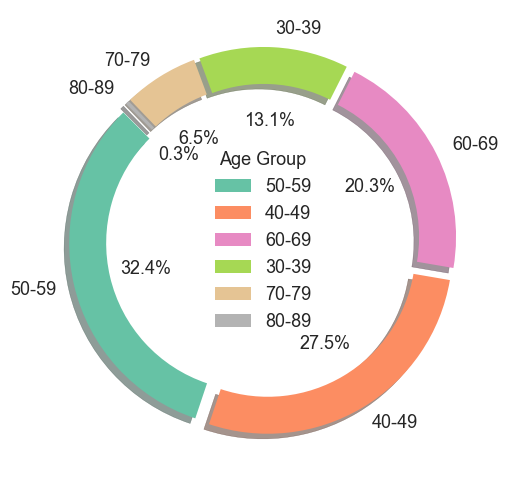

In [33]:
df_brc['Age_Group'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05], fontsize=13,autopct='%3.1f%%',figsize=(6,6), shadow=True, startangle=135,legend=True,wedgeprops=dict(width=0.20), cmap='Set2')
plt.legend(loc='center')
plt.legend(fontsize=13,loc = 10,title = "Age Group",title_fontsize = 13)
plt.ylabel('')
plt.show()

<U><b>Observation</b></U><BR>
   - Largest number of surgeries **(32.4%)** are caried out for Age Group **50-59**
   - Approximately **87%** of surgeries are performed post Age of **40** 

<a id=section1002></a>
### 10.2. Age Group wise Survival Status

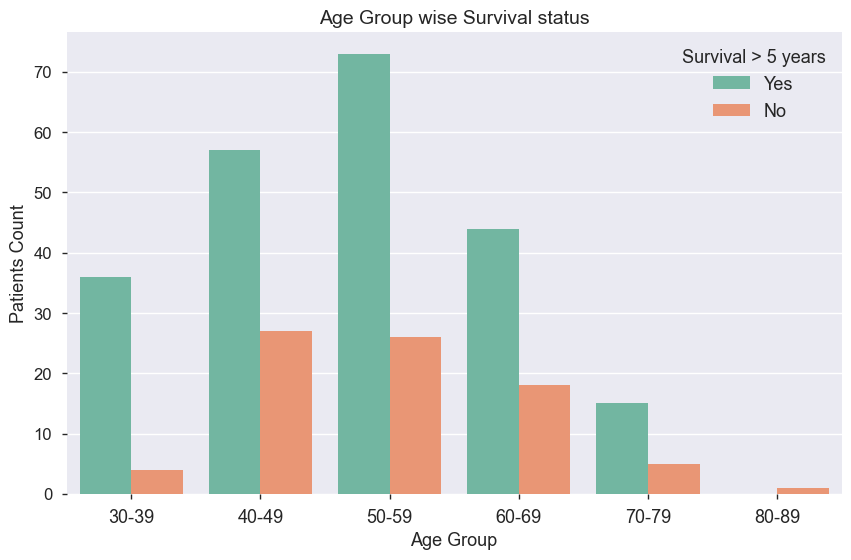

In [34]:
fig,ax =plt.subplots(figsize=(10,6))
sns.countplot(data = df_brc,x = 'Age_Group', hue='SurvivalGreaterThan_5yrs',palette='Set2')
plt.title('Age Group wise Survival status',fontsize=14)
plt.xlabel('Age Group',fontsize=13)
plt.ylabel('Patients Count',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)  
plt.legend(loc='upper right',fontsize=13,title = "Survival > 5 years",title_fontsize = 13)

<U><b>Observation</b></U><BR>
-  In Age Group **30-39**, **90%** of patients had survived for greater than 5 years.     
-  Hence survival rate is high if surgery is carried out at earlier age **(30-39)**

<a id=section11></a>
## 11. Analysis based on Positive Axillary Nodes

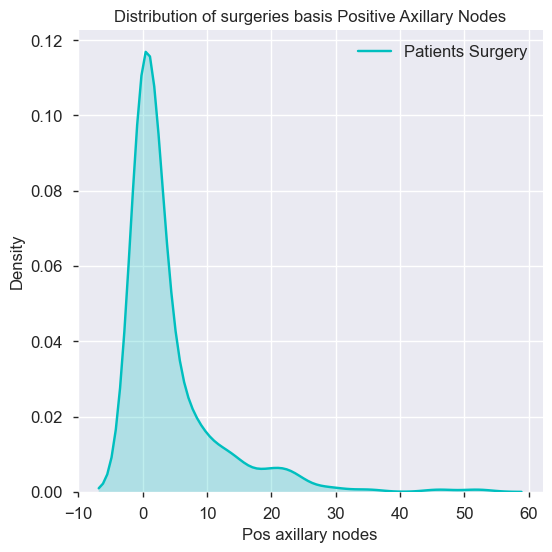

In [35]:
a4_dims = (6, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df_brc['Pos_axillary_nodes'], shade=True, Label='Patients Surgery', color='c')
plt.title("Distribution of surgeries basis Positive Axillary Nodes")
plt.xlabel("Pos axillary nodes",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.legend(loc='upper right',fontsize=12)

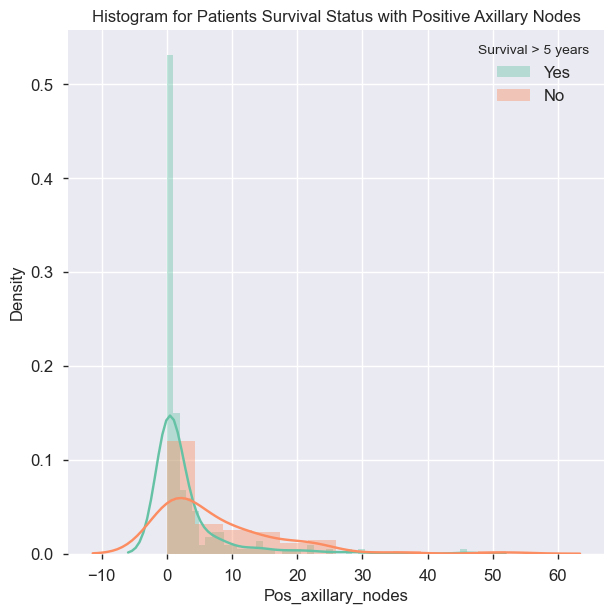

In [36]:
    sns.FacetGrid(data = df_brc, hue = 'SurvivalGreaterThan_5yrs', height = 5,size=6,legend_out=False,palette='Set2') \
    .map(sns.distplot, 'Pos_axillary_nodes') \
    .add_legend(); 
    plt.title("Histogram for Patients Survival Status with Positive Axillary Nodes")
    plt.xlabel("Pos_axillary_nodes",fontsize=12)
    plt.ylabel("Density",fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)  
    plt.legend(loc='upper right',fontsize=12,title = "Survival > 5 years")

<U><b>Observation</b></U><BR>
-  **Nearly half of surgeries are done even though there is no positive axillary nodes.** 
-  As the number of positive axillary nodes increases , number of people dying within 5 yrs ,are more than surviving for greater than 5 years. 
- Between **positive axillary nodes 0-4** ,number of patients surviving for more than 5 years is almost double the patients dying in less than 5 years.

<a id=section12></a>
## 12. Survival status analysis with Age,Year of Surgery and Positive Axillary Nodes with Box plot and Violin plot

<Figure size 800x550 with 0 Axes>

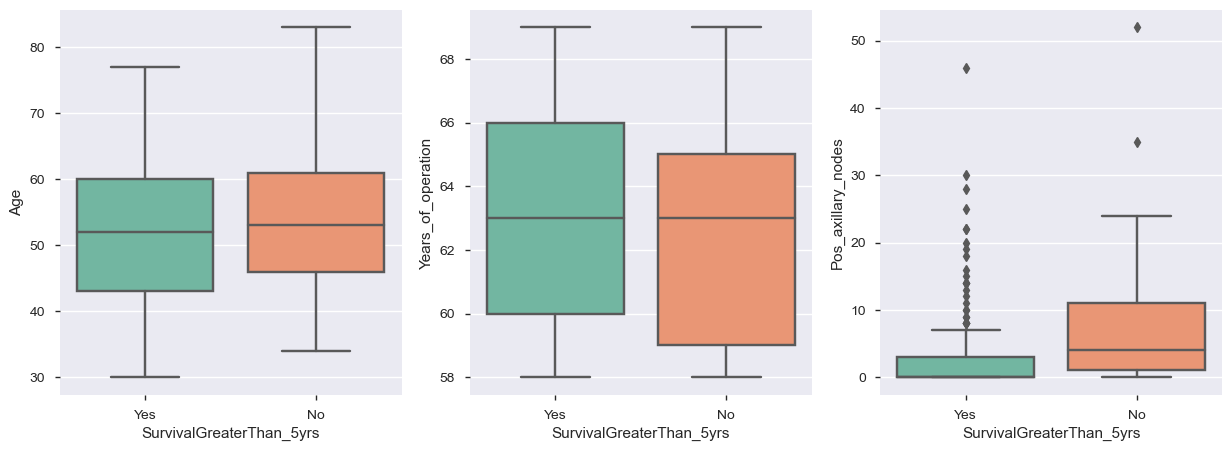

In [37]:
# Create box and whisker plot for each feature
plt.figure(1)
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.boxplot(x = 'SurvivalGreaterThan_5yrs', y = 'Age', data = df_brc,palette='Set2')
plt.subplot(132)
sns.boxplot(x = 'SurvivalGreaterThan_5yrs', y = 'Years_of_operation', data = df_brc,palette='Set2')
plt.subplot(133)
sns.boxplot(x = 'SurvivalGreaterThan_5yrs', y = 'Pos_axillary_nodes', data = df_brc,palette='Set2')
plt.show()

<Figure size 800x550 with 0 Axes>

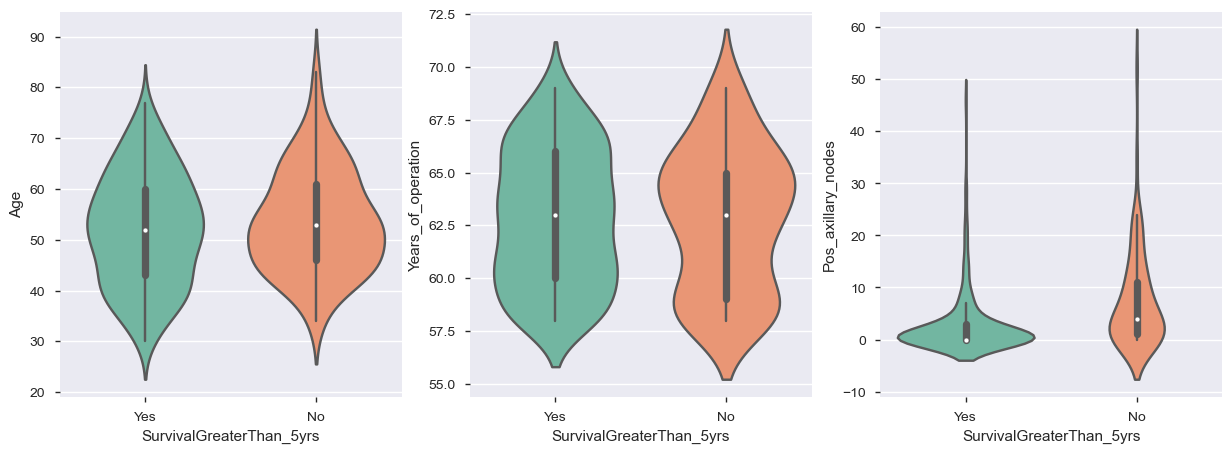

In [38]:
# Create violin plots for each feature
plt.figure(1)
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.violinplot(x = "SurvivalGreaterThan_5yrs",y = "Age",data = df_brc,height = 10,palette='Set2')
plt.subplot(132)
sns.violinplot(x = "SurvivalGreaterThan_5yrs",y = "Years_of_operation",data = df_brc,height = 10,palette='Set2')
plt.subplot(133)
sns.violinplot(x = "SurvivalGreaterThan_5yrs",y = "Pos_axillary_nodes",data = df_brc,height = 10,palette='Set2')
plt.show()

<U><b>Observation</b></U><BR>
-  More number of patients with age between **45 to 55** were died in less than 5 years
-  Also there is large number of patients between **50 to 60** who had survided for more than 5 years
-  Highest number of patient died in less than 5 years , where surgery is done between 1964 to 1965
-  As the number of positive axillary nodes increases there are more patients who died in less than 5 years.
- Between **positive axillary nodes 0-4** ,number of patients surviving for more than 5 years is almost double the patients dying in less than 5 years.

<a id=section13></a>
## 13. Conclusion

- **Overall** there is **73.5 %** chance of survival for **more than 5 years** post-surgery in breast cancer, which may vary depending on other factors also.
- **Highest number of deaths** of patients within 5 years of surgery are seen between **1964 to 1965.**
- **Highest number of patients had survived** for more than 5 years whose surgeries are carried out in **1960.**
- **87 %** of surgeries are carried out **post age of 40** and **highest** in Age group **50-59 (32.4%)**.
- There is very **high changes of patient surviving** for more than 5 years if surgery is carried out in **age group of 30-39** 
- **44% of surgeries** are done even though there are **no positive axillary node**.
- **Higher the number of positive axillary nodes present, lower is the change of survival for more than 5 years**.


<a id=section1301></a>
### 13.1. Actionable Insights

- Post **age of 30** all women should undergo **breast cancer test**, for early diagnosis and cure, and if required undergo surgery as the survival rate is high in-age group from **30-39.**
- If breast cancer is diagnosed as **ductal cancer** and if it is increasing, then it is better to undergo surgery even if there are **no positive Axillary nodes** to avoid spread.
- Doctors should refer to historical records and surgery reports to understand and **learn from success in 1960 and also study what went wrong in surgeries between 1964 to 1965**.
